In [23]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from textblob import TextBlob
import json

text = open('HarryPotter.txt')
text = text.read()


In [24]:
# Function returns a list of sentences that contain a name

def character_sentences(character):
    character_sents = []
    with open('sentences.json', 'r') as fp:
        sentences =  json.load(fp)
    for sent in sentences:
        if character in sent:
            character_sents.append(sent)
    return character_sents
     
sentences = character_sentences('Snape')
print(sentences[0:10])

['Oh you know Quirrell already do you No wonder hes looking so\nnervous thats Professor Snape.', 'Knows an awful lot about\nthe Dark Arts Snape.', 'Harry watched Snape for a while but Snape didnt look at him again.', 'Harry told the turban he didnt want to be in Slytherin it\ngot heavier and heavier he tried to pull it off but it tightened\npainfully  and there was Malfoy laughing at him as he struggled with\nit then Malfoy turned into the hooknosed teacher Snape whose laugh\nbecame high and cold  there was a burst of green light and Harry woke\nsweating and shaking.', 'Snapes Head of\nSlytherin House.', 'At the startofterm banquet Harry had gotten the idea that Professor\nSnape disliked him.', 'Snape didnt dislike Harry  he hated him.', 'Snape like Flitwick started the class by taking the roll call and\nlike Flitwick he paused at Harrys name.', 'Snape finished calling the names and looked up at the class.', 'He spoke in barely more than a whisper but\nthey caught every word  like Prof

In [41]:
# Function takes in a name and and a sample size and returns a dictinary with a chronological counter and polarity
def character_journey(character, sample_size):
    sentences = character_sentences(character)
    character_journey = {}
    counter = 0
    upper_slice = sample_size
    lower_slice = 0
    while upper_slice < len(sentences):
        sample = sentences[lower_slice : upper_slice]
        sample = ' '.join(sample)
        character_journey[str(counter)] = TextBlob(sample).polarity
        counter += 1
        upper_slice += sample_size
        lower_slice += sample_size
    return character_journey

def character_journey_cumulative(character, sample_size):
    sentences = character_sentences(character)
    character_journey = {}
    counter = 0
    upper_slice = sample_size
    lower_slice = 0
    overall_polarity = 0
    while upper_slice < len(sentences):
        sample = sentences[lower_slice : upper_slice]
        sample = ' '.join(sample)
        overall_polarity += TextBlob(sample).polarity
        character_journey[str(counter)] = overall_polarity
        counter += 1
        upper_slice += sample_size
        lower_slice += sample_size
        if counter ==7 or counter== 8:              #YOU CAN ISOLATE KEY TEXT HERE
            print(sample)
            print('END')
    return character_journey

In [42]:
#Try for different characters in the book
protagonist = 'Hermione'
character_j = character_journey(protagonist,10)
character_jc = character_journey_cumulative(protagonist,10)

Hermione Granger telling a downright lie to a
teacher If they hadnt found me Id be dead now. Well  in that case... said Professor McGonagall staring at the
three of them Miss Granger you foolish girl how could you think of
tackling a mountain troll on your own

Hermione hung her head. Hermione was the last
person to do anything against the rules and here she was pretending
she had to get them out of trouble. Hermione left. Five you mean once shes taken off Hermiones. Hermione however stood alone by the door waiting
for them. But from that moment on Hermione Granger became their friend. Hermione had become a bit more relaxed about breaking rules since Harry
and Ron had saved her from the mountain troll and she was much nicer
for it. Harry
Ron and Hermione moved closer together to block the fire from view
they were sure it wouldnt be allowed. Harry Ron and
Hermione sat together next to a window.
END
Hermione was checking Harry and
Rons Charms homework for them. Why should he be afraid of

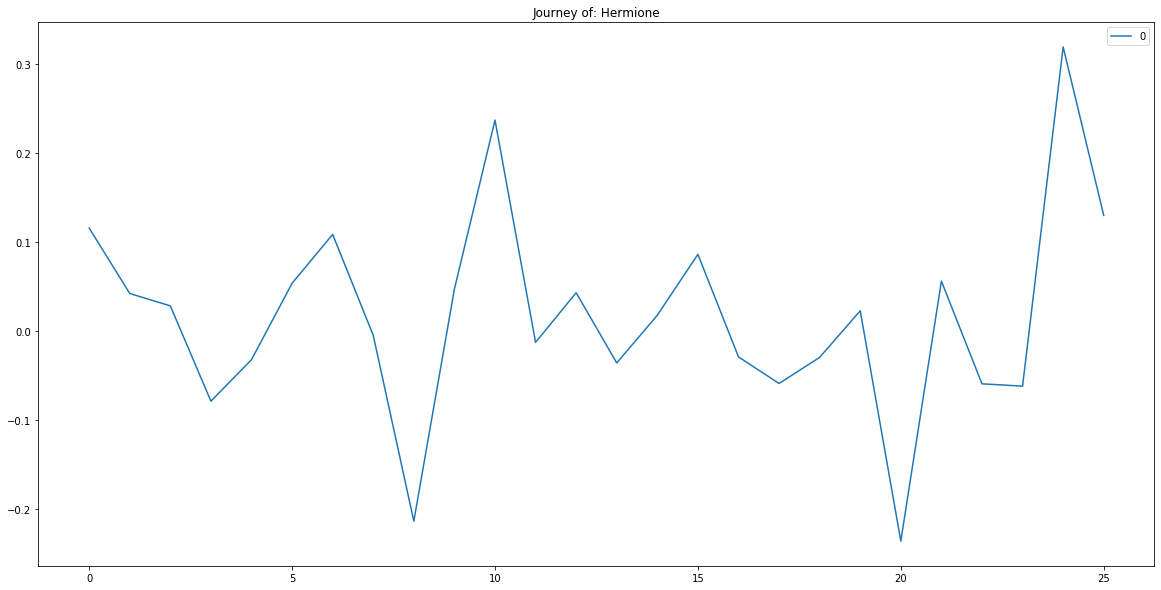

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame.from_dict(character_j, orient = 'index')
#print(df)

df.plot.line(figsize = (20,10), title= 'Journey of: ' + protagonist)
#df.plot(figsize = (10,10)).bar()

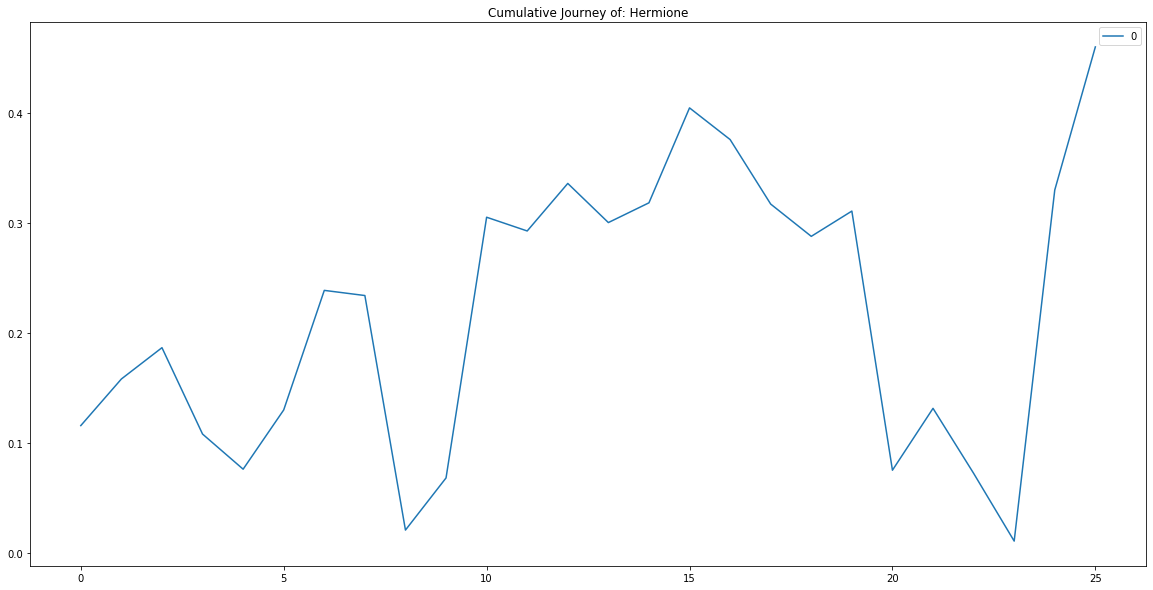

In [38]:
df = pd.DataFrame.from_dict(character_jc, orient = 'index')
#print(df)

df.plot.line(figsize = (20,10),title= 'Cumulative Journey of: ' + protagonist)
#df.plot(figsize = (10,10)).bar()